<a href="https://colab.research.google.com/github/mahdid-lilia/CLA-BOOTCAMP/blob/master/Unit%204/Homeworks/Example_of_network_implementation_in_tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
%matplotlib inline
from matplotlib.pyplot import imshow
from tensorflow.keras import layers,Input
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras import regularizers
from tensorflow import keras 
import io
import os
import pickle as pk
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import seaborn as sb
import datetime



In [14]:
(train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


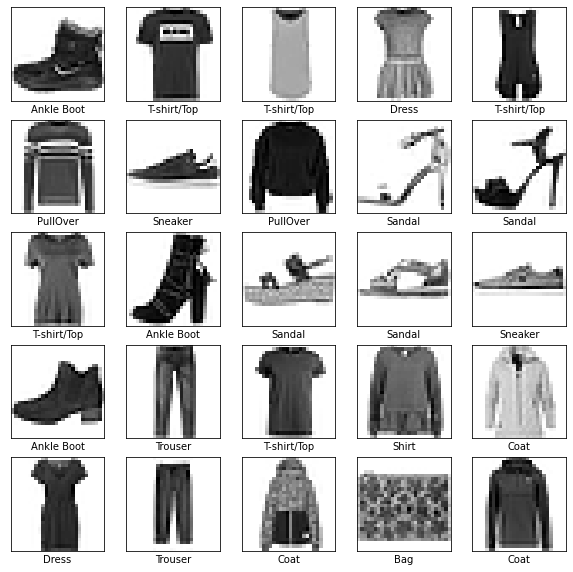

In [18]:
#plot a sample of dataset
plt.figure(figsize=(10,10))
class_names=['T-shirt/Top', 'Trouser', 'PullOver', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()  

In [31]:
def make_model():
  model= Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(128, activation='tanh', kernel_initializer='he_normal' , input_shape=(784,)))
  model.add(Dropout(0.4))
  model.add(Dense(128, activation='tanh', kernel_initializer='he_normal'))
  model.add(Dropout(0.4))
  model.add(Dense(100, activation='tanh', kernel_initializer='he_normal'))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='sigmoid', kernel_initializer='he_normal'))
  return model
model=make_model()



In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
history= model.fit(train_images, train_labels, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 8s 4ms/step - loss: 1.4904 - accuracy: 0.4101
Epoch 2/200
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2382 - accuracy: 0.4945
Epoch 3/200
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2417 - accuracy: 0.4956
Epoch 4/200
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1608 - accuracy: 0.5357
Epoch 5/200
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1145 - accuracy: 0.5583
Epoch 6/200
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0698 - accuracy: 0.5747
Epoch 7/200
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0467 - accuracy: 0.5783
Epoch 8/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0028 - accuracy: 0.6017
Epoch 9/200
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0047 - accuracy: 0.6021
Epoch 10/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9916 

In [34]:
checkpoint_path ='./tensorflow.cpkt'
model.save_weights(checkpoint_path)

In [35]:
model_ckpt2=make_model()
model_ckpt2.load_weights(checkpoint_path)